In [164]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import string
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
from tqdm import tqdm_notebook
import numpy as np
import ngrams
from collections import Counter
import time
import os
import enchant
import time
import tqdm

import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
def clean_wordsList(text):
    
    tokens = word_tokenize(text)
    # remove punctuation from each word
    tokens = [w.lower() for w in tokens]
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english')+stopwords.words('spanish'))
    stop_words.add('html')
    stop_words.add('.html')
    stop_words.add('www')
    stop_words.add('http')
    stop_words.add('au')
    stop_words.add('com')
    stop_words.add('https')
    stop_words.add('htm')
    stop_words.add('php')
    stop_words.add('spip')
    stop_words.add('id')
    stop_words.add('sid')
    stop_words.add('cms')
    stop_words.add('xhtml') 
    stop_words.add('storyid')
    stop_words.add('new')
    stop_words.add('news')
    stop_words.add('whats')
    
    stop_words.add('people')
    stop_words.add('put')
    words = [w for w in words if not w in stop_words]
    
    return words

def TF_IDF(kw_list,df):
    new_list = []
    for i in kw_list:
        tf = 0
        idf = 0
        total_words = 0
        tf = kw_list.count(i)
        total_words = len(kw_list)
        for x in df.clean_words:
            if i in x:
                idf += 1
        tf_cal = tf/total_words
        idf_cal = np.log(len(df.clean_words)/(idf+1))
        new_list.append(tf_cal*idf_cal)
    return new_list

def clean_text(text_list):
    new_str_list = []
    for i in text_list:
        #Remove 'b''
        t_str = re.sub("b'", ' ', str(i))
        #Remove '\n' or '\(letters+number)' or '(\letters)' 
        t_str = re.sub(r"\\n|\\\w+\d+|\\\w+", ' ', t_str)
        #Remove '(symbols: !%$..)'
        t_str = re.sub("\W+", ' ', t_str)
        #Remove space at front and in the end
        t_str = re.sub("^\s|\s$", '', t_str)
        #Convert multiple spaces into one space
        t_str = re.sub("\s+", ' ', t_str)
        new_str_list.append(t_str)
    return new_str_list

def return_end_title(url_list):
    title_list = []
    for i in url_list:
        info = i.split('/')[-1]
        if info == '':
            title_list.append(i.split('/')[-2])
        elif info.isdigit() == True:
            title_list.append(i.split('/')[-2])
        else:
            title_list.append(info)        
    return title_list

def clean_text_merge(text_list):
    new_str_list = ''
    for i in text_list:
        new_str_list += i
    return new_str_list

def ranking(url_list, SDG, company_name):
    Dict = {}
    for i in range(len(url_list)):
        count = 0
        for j in data[SDG].dropna():
            if ' ' in j:
                if j in url_list[i]:
                    count += 1
            else:
                synonyms = []
                for syn in wordnet.synsets(j):
                    for l in syn.lemmas():
                        synonyms.append(l.name())
                for m in set(synonyms):
                    if m in url_list[i]:
                        count += 1
        if company_name.split()[0] in url_list[i]:
            count += 1
        Dict[i] = count
    return Dict

def check_english(wordlist):
    d = enchant.Dict("en_US")
    new_list = []
    for i in wordlist:
        if d.check(i) == True:
            new_list.append(i)
    return new_list

In [3]:
#read file
df = pd.read_pickle('Daily_url')

In [4]:
df = df.set_index('COMPANY')

In [5]:
df

,date,SDG_1,SDG_10,SDG_11,SDG_12,SDG_13,SDG_14,SDG_15,SDG_16,SDG_17,...,SDG_1_url,SDG_2_url,SDG_3_url,SDG_4_url,SDG_5_url,SDG_6_url,SDG_7_url,SDG_8_url,SDG_9_url,Ticker
COMPANY,,,,,,,,,,,,,,,,,,,,,
a. o. smith corp,2015-02-19,NaN,NaN,-0.00759907,1.06007,NaN,NaN,NaN,NaN,NaN,...,[],[http://www.nasdaq.com/article/rexnord-shows-s...,[http://www.nasdaq.com/article/rexnord-shows-s...,[],[],[http://www.nasdaq.com/article/rexnord-shows-s...,[],[http://www.nasdaq.com/article/rexnord-shows-s...,[http://www.nasdaq.com/article/altra-industria...,AOS
a. o. smith corp,2015-02-20,NaN,-0.992555831265509,-0.992555831265509,NaN,NaN,NaN,NaN,NaN,NaN,...,[],[],[],[],[],[],[http://www.nasdaq.com/article/should-you-reco...,[http://www.nasdaq.com/article/should-you-reco...,[http://www.nasdaq.com/article/should-you-reco...,AOS
a. o. smith corp,2015-02-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,[],[],[],[http://www.gaininggreen.com/active-movers-ban...,[],[],[],[http://www.nasdaq.com/article/ingersoll-ir-hi...,[],AOS
a. o. smith corp,2015-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,[],[],[],[],[],[],[],[http://www.nasdaq.com/article/middleby-to-boo...,[],AOS
a. o. smith corp,2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,[],[],[],[],[],[],[],[http://www.nasdaq.com/article/kadant-scales-a...,[],AOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoetis inc,2019-08-14,NaN,1.20746,1.14032,NaN,NaN,NaN,NaN,1.07317,NaN,...,[],[https://www.tickerreport.com/banking-finance/...,[https://www.tickerreport.com/banking-finance/...,[],[],[],[],[https://www.tickerreport.com/banking-finance/...,[],ZTS
zoetis inc,2019-08-15,NaN,NaN,2.71679,NaN,NaN,NaN,NaN,NaN,NaN,...,[],[https://www.thedailytimes.com/business/zoetis...,[https://www.thedailytimes.com/business/zoetis...,[],[],[],[],[https://www.dailypolitical.com/2019/08/14/zoe...,[https://patch.com/connecticut/ridgefield/suga...,ZTS
zoetis inc,2019-08-16,NaN,NaN,0.705580500320719,NaN,NaN,NaN,NaN,NaN,NaN,...,[],[],[https://cryptocoinstribune.com/lockheed-marti...,[],[],[],[],[https://cryptocoinstribune.com/lockheed-marti...,[],ZTS


In [170]:
df2 = df.loc["mcdonald's corp"]

In [73]:
#For overall average sdg
# df_reset = df2.reset_index().copy()
# df_ave = df_reset[['SDG_'+str(x+1) for x in range(17)]]
# df2['SDG_average'] = df_ave.mean(axis=1)

/Users/wangzhe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


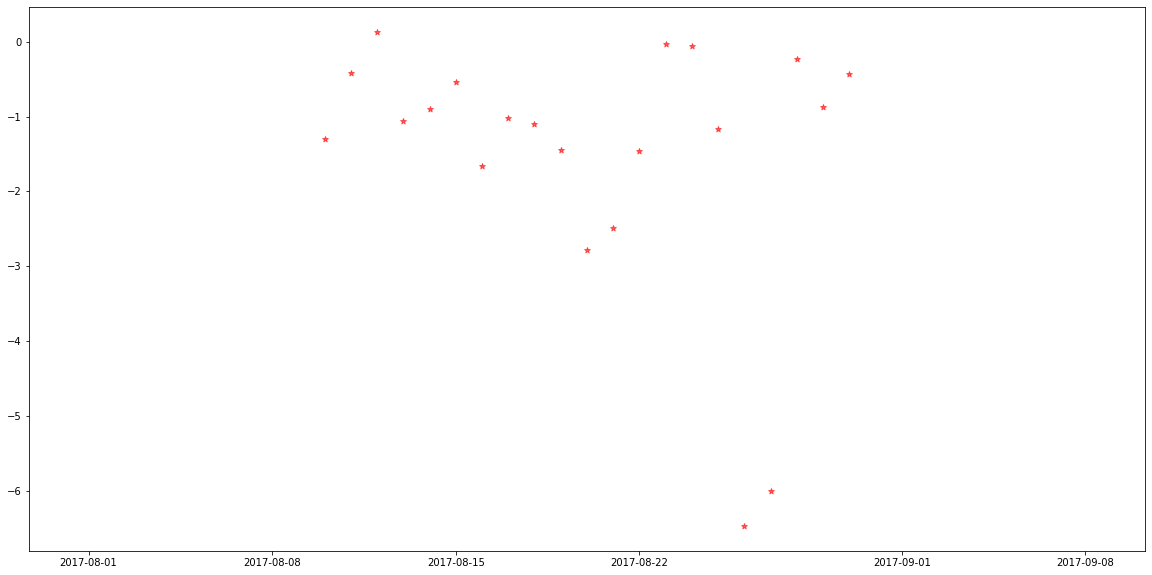

In [172]:
#To show the fluctuation of SDG value in a period of time
mask = (df2['date'] >= '2017-08-10') & (df2['date'] <= '2017-08-30')
df22 = df2.loc[mask]
x = df22.date
y = df22.SDG_14

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(x, y, color = 'red', alpha = '0.6', marker = '*')




In [173]:
#to show the list of SDG values of a company in a period of time
df22[['date','SDG_14']]

,date,SDG_14
COMPANY,,
mcdonald's corp,2017-08-10,-1.29955
mcdonald's corp,2017-08-11,-0.412693
mcdonald's corp,2017-08-12,0.125526
mcdonald's corp,2017-08-13,-1.05883
mcdonald's corp,2017-08-14,-0.894041
mcdonald's corp,2017-08-15,-0.536247
mcdonald's corp,2017-08-16,-1.66111
mcdonald's corp,2017-08-17,-1.0259
mcdonald's corp,2017-08-18,-1.09768


In [6]:
data = pd.read_csv('UNGC_SDG_antonyms - March12.csv')

In [7]:
data

,Unnamed: 0,1. No Poverty,2. Zero Hunger,3. Good Health and Well-being,4. Quality Education,5. Gender Equality,6. Clean Water and Sanitaion,7. Affordable and Clean Energy,8. Decent Work and Economic Growth,"9. Industry, Innovation and Infrastructure",10. Reduced Inequalities,11. Sustainable Cities and Communities,12. Responsible Consumption and Production,13. Climate Action,14. Life below Water,15. Life on Land,"16. Peace, Justice and Strong Institutions",17. Partnerships for the Goals,All
0,0.0,unemployed person,animal genetic,vaccine,knowledge,asexual,lake,energy mix,labour safetychildren's rights,startup,international organization,holistic disaster risk management,food loss,climate action,enhance scientific cooperation,pursue sustainable livelihood opportunity,transparent institution,stakeholder partnership,unemployed person
1,1.0,disaster risk,commercial agriculture,medical,pedagogical purpose,sexual health,watersheds,energy technology,migrant worker,entrepreneurs,small-scale industry,disaster risk reduction,hazardous waste treat,environmental protection,united nation framework convention,wildlife,prison population,sustainable develop,disaster risk
2,2.0,population living,food production,water-borne,quality education,woman equal,oceans,affordable energy,pocal product,small-scale industrial,official development assistance,population growth,sustainable pattern,co2,overfishing,ecosystem,international organization,nonequity investment instruments,population living
3,3.0,work-injury victims,land use,child health,reading,women's economic empowermentpay gap,ecosystem,energy infrastructure,recruitment,small business owner,financial soundness indicator,urban planning,national policy,disaster risk reduction,sustainable fishery,official development assistance,civil authority,ir department,work-injury victims
4,4.0,social protection floor,chemicals,health organization,primary entry,genital,groundwater,electricity,productive employment,entrepreneurship,donor country,waste management,plasticfinancial reporting,zero waste,seafood,combat desertification,peace,financial inclusion,social protection floor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,banking
801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,south-south cooperation
802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,island develop
803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,financial services


In [160]:
data_ex = pd.read_pickle('SDG_13_examples.pickle')

In [161]:
data_ex

,COMPANY,SDG_13,SDG_13_Date
0,akamai technologies inc,-5.639065,2017-09-19
1,american airlines group,-5.768577,2017-08-25
2,anadarko petroleum corp,-5.441076,2017-08-26
3,apple inc,-5.520593,2018-08-06
4,centerpoint energy inc,-5.670717,2016-04-18
5,conocophillips,-5.825609,2018-06-23
6,delta air lines inc,-6.581901,2019-02-14
7,duke energy corp,-6.668990,2017-03-01
8,entergy corp,-6.501640,2016-02-24
9,exxon mobil corporation,-5.979286,2016-07-26


In [ ]:
#Type 1 wordcloud
#generate 18 sdgs graphs of good examples based on good examples pickle files
for j in tqdm.tqdm_notebook(range(1,18)):
    data_ex = pd.read_pickle('SDG_' + str(j) + '_examples.pickle')
    for i in range(len(data_ex)):
        title_ex = data_ex['COMPANY'][i] + ' / ' + data_ex.columns[1] + ' ' + str(data_ex[data_ex.columns[1]][i]) + ' / ' + data_ex[data_ex.columns[2]][i].strftime('%Y-%m-%d')
        save_title = data_ex.columns[1] + ' ' + data_ex['COMPANY'][i] + '.png'
        mask = (df['date'] == data_ex[data_ex.columns[2]][i].strftime('%Y-%m-%d'))
        df1 = df.loc[mask]
        try:
            df1 = df1.set_index('COMPANY')
        except:
            pass

        list1 = return_end_title(df1.loc[data_ex['COMPANY'][i]][data_ex.columns[1] + '_url'])
        list1 = set(list1)
        list2 = clean_text(list1)
        ranking_dict = ranking(list2, '1. No Poverty', data_ex['COMPANY'][i])
        k = Counter(ranking_dict)  
        # Finding 3 highest values 
        high = k.most_common(100)
        ranking_list = []
        for i in high:
            ranking_list.append(list2[i[0]])

        list2 = clean_text_merge(ranking_list)
        list3 = clean_wordsList(list2)
        list4 = check_english(list3)
        new = Counter(list4)

        import matplotlib.pyplot as plt
        from wordcloud import WordCloud

        wordcloud = WordCloud(max_words =100,
                       max_font_size=200, width=1000, height=500)
        wordcloud.generate_from_frequencies(frequencies = new)
        plt.figure( figsize=(20,10) )
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.title(title_ex, 
                  {'fontsize': 18, 'color':'darkred', 'weight':'bold'})
        plt.axis("off")
        plt.show()
        wordcloud.to_file('SDG good example graphs/SDG' + str(j) +'/' + save_title)


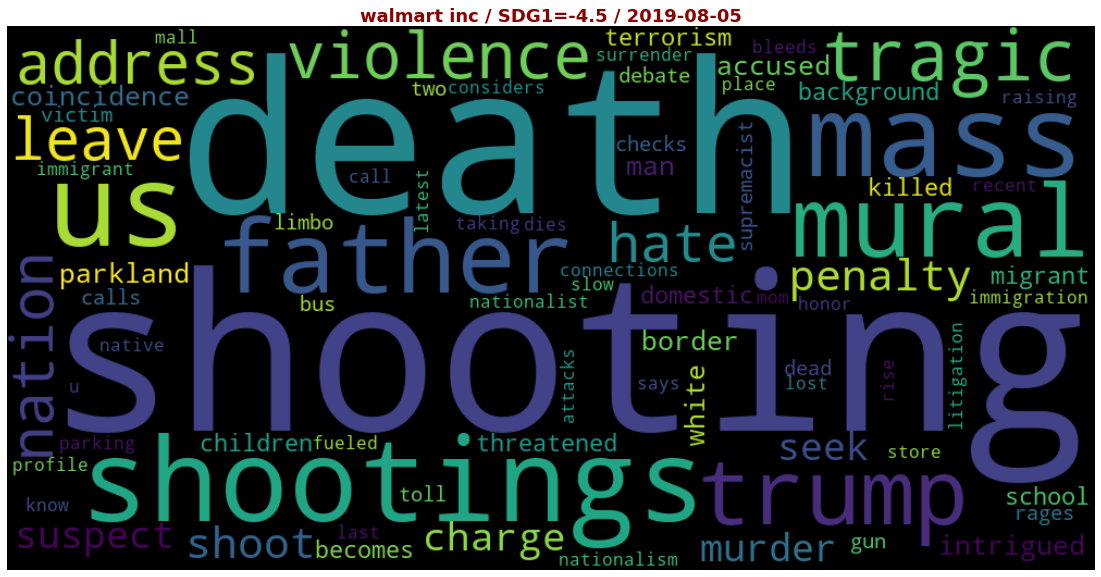

1.2420051097869873


In [178]:
#type 2 wordcloud
#Generate a single wordcloud on a specific day specific company
st = time.time()
#change the day below
mask = (df['date'] >= '2019-08-05') & (df['date'] <= '2019-08-05')
df1 = df.loc[mask]
try:
    df1 = df1.set_index('COMPANY')
except:
    pass

#change the company and sdg below
list1 = return_end_title(df1.loc['walmart inc']['SDG_1_url'])
list1 = set(list1)
list2 = clean_text(list1)
ranking_dict = ranking(list2, '1. No Poverty', "walmart inc")
k = Counter(ranking_dict)  
# Finding 3 highest values 
high = k.most_common(100)
ranking_list = []
for i in high:
    ranking_list.append(list2[i[0]])

list2 = clean_text_merge(ranking_list)
list3 = clean_wordsList(list2)
list4 = check_english(list3)
new = Counter(list4)

wordcloud = WordCloud(max_words =80,
               max_font_size=200, width=1000, height=500)
wordcloud.generate_from_frequencies(frequencies = new)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")

#change the title below
plt.title('walmart inc / SDG1=-4.5 / 2019-08-05', {'fontsize': 18, 'color':'darkred', 'weight':'bold'})
plt.axis("off")
plt.show()
et = time.time()
print(et-st)

In [128]:
#import pickle
# with open('walmart 2019-08-05.pickle','wb') as handle:
#     pickle.dump(df1.loc["walmart inc"].SDG_5_url,handle)

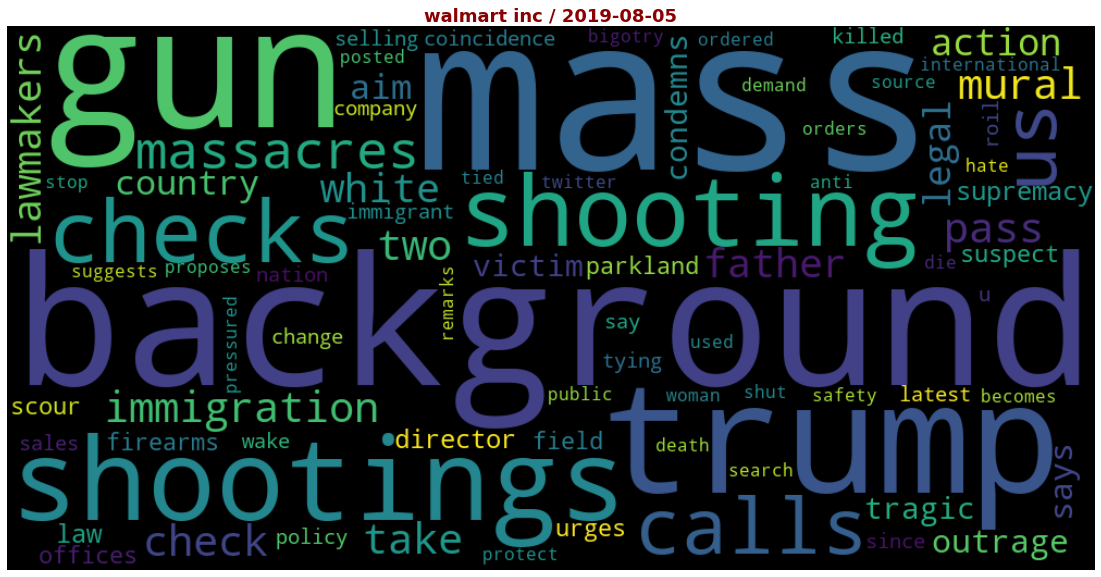

13.181885957717896


In [34]:
#type 3 wordcloud
#all sdg Wordcloud
st = time.time()
mask = (df['date'] >= '2019-08-05') & (df['date'] <= '2019-08-05')
df1 = df.loc[mask]
try:
    df1 = df1.set_index('COMPANY')
except:
    pass

list_all = []
for i in range(17):
    list_all = list_all + df1.loc['walmart inc']['SDG_' + str(i+1) + '_url']

list1 = return_end_title(list_all)
list1 = set(list1)
list2 = clean_text(list1)
ranking_dict = ranking(list2, 'All', "walmart inc")
k = Counter(ranking_dict)  
# Finding 3 highest values 
high = k.most_common(100)
ranking_list = []
for i in high:
    ranking_list.append(list2[i[0]])

list2 = clean_text_merge(ranking_list)
list3 = clean_wordsList(list2)
list4 = check_english(list3)
new = Counter(list4)

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(max_words =80,
               max_font_size=200, width=1000, height=500)
wordcloud.generate_from_frequencies(frequencies = new)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('walmart inc / 2019-08-05', {'fontsize': 18, 'color':'darkred', 'weight':'bold'})
plt.axis("off")
plt.show()
et = time.time()
print(et-st)

In [174]:
df1.loc["mcdonald's corp"].SDG_14_url

['http://registerguard.com/rg/news/35560302-76/troubled-trailer-park-north-of-cottage-grove-purchased-by-st.-vincent-de-paul.csp',
 'https://www.optimistdaily.com/2017/05/the-most-hopeful-courtroom-in-the-world-2/',
 'http://lmtribune.com/northwest/kempthorne-returning-to-ui-for-honorary-degree/article_f802aaeb-047a-5940-9d3c-c5ccf7d3016f.html',
 'http://www.bbc.com/future/story/20170509-the-unpopular-rise-of-self-checkouts-and-how-to-fix-them',
 'http://afloat.ie/resources/news-update/item/35778-pwc-makes-sponsorship-deal-for-our-ocean-wealth-summit',
 'http://www.tctimes.com/news/your-crime-determines-where-you-serve-your-time/article_0825d1fc-357c-11e7-a566-0fa80a69abcd.html',
 'http://www.gaystarnews.com/article/six-hidden-london-gems230312/',
 'http://www.citybeat.com/what-a-week/article/20861054/what-a-week-may-39',
 'http://www.carrollcountytimes.com/bs-wk-crowlers-growlers-baltimore-20170510-story.html',
 'http://sacramento.cbslocal.com/2017/05/10/aly-yeoman-body-found/',
 'htt

# test

In [106]:
from matplotlib.backends.backend_pdf import PdfPages

In [636]:
sd = pd.read_csv('/Users/macglobalai/Desktop/SDG/new_data_v3.1_morgan/daily_new_v3.1.csv')

In [635]:
df1.loc['fedex corp'].SDG_8_url

['http://www.rocklandtimes.com/2016/03/18/dimond-easing-prison-overcrowding-who-wins-early-release-and-who-doesnt/',
 'http://www.haberajans.net/Fedex-shipping-times',
 'http://www.haberajans.net/Fedex-shipping-times',
 'http://www.haberajans.net/Fedex-shipping-times',
 'http://forum.pafoa.org/external.php?s=5447ff1d2a157bbbf70d92bf1623897b&type=RSS2&forumids=2',
 'https://www.equities.com/news/brief-fedex-stock-ticks-up-again-friday',
 'https://www.equities.com/news/brief-fedex-stock-ticks-up-again-friday',
 'http://www.uniondemocrat.com/opinion/4138788-151/overcrowding-in-prisons-who-wins-early-release-and',
 'http://forum.pafoa.org/external.php?s=81fb973117105ce73d0a1807f7395791&type=RSS2&forumids=2',
 'http://www.4-traders.com/FEDEX-CORPORATION-12585/news/FedEx-stock-ticks-up-again-Friday-BRIEF-22040980/',
 'http://www.4-traders.com/FEDEX-CORPORATION-12585/news/FedEx-stock-ticks-up-again-Friday-BRIEF-22040980/',
 'http://forum.pafoa.org/external.php?s=4d300d467b2a0212632b0d8ef473dd

In [353]:
mask = (df['date'] >= '2019-03-01') & (df['date'] <= '2019-06-01')

In [354]:
df1 = df.loc[mask]

In [355]:
df1 = df1.set_index('COMPANY')

In [356]:
new_list = []
for i in df1.loc['united parcel service inc'].SDG_5_url:
    new_list += i

In [357]:
list1 = return_end_title(new_list)

In [358]:
list1

['forbes-tate-adds-two-404016',
 'infco20190304066',
 'ballard-signs-zimbabwe-404638',
 'as-microsoft-msft-market-valuation-rose-holder-lockheed-martin-investment-management-company-has-cut-holding-by-1-82-million-astrazeneca-plc-adr-azn-position-maintained-by-janney-capital-manage',
 'black-workers-ups-facility-ohio-021032800.html',
 'article_d5a4c4c0-45f2-11e9-b7e0-5b188a2ec465.html',
 'ar-BBUKc5C',
 'malaysia-morning-news-for-march-14-3',
 '3157799002',
 'african-american-workers-sue-ups-racial-discrimination-2775343',
 '108501-black-workers-at-ups-hub-say-they-were-targets-of-racism',
 'lawsuit-black-ups-workers-targeted-with-racist-taunts-and-harassment',
 'article_30afdb3f-9edc-55d9-9ab5-4a3c5bb3f4a9.html',
 'Black-workers-at-UPS-hub-say-they-were-targets-of-13687978.php',
 'united-parcel-service-sued-for-racial-bias',
 'black-workers-at-ups-hub-say-they-were-targets-of-racism-2',
 'black-workers-at-ups-hub-say-they-were-targets-of-racism',
 'black-ups-workers-file-lawsuit-detail

In [359]:
list1 = set(list1)

In [360]:
list2 = clean_text(list1)

In [361]:
list2 = clean_text_merge(list2)

In [362]:
list3 = clean_wordsList(list2)

In [363]:
new = Counter(list3)

In [364]:
# Remove stop words and extract key wards
#df['clean_words'] = df.Source.apply(lambda x: clean_wordsList(x))

In [365]:
# Create a dictionary to match the frequency of words
#new = dict(zip(df.loc['apple inc'].clean_words,TF_IDF(df.loc['apple inc'].clean_words,df)))
                                                                    
                                                                    

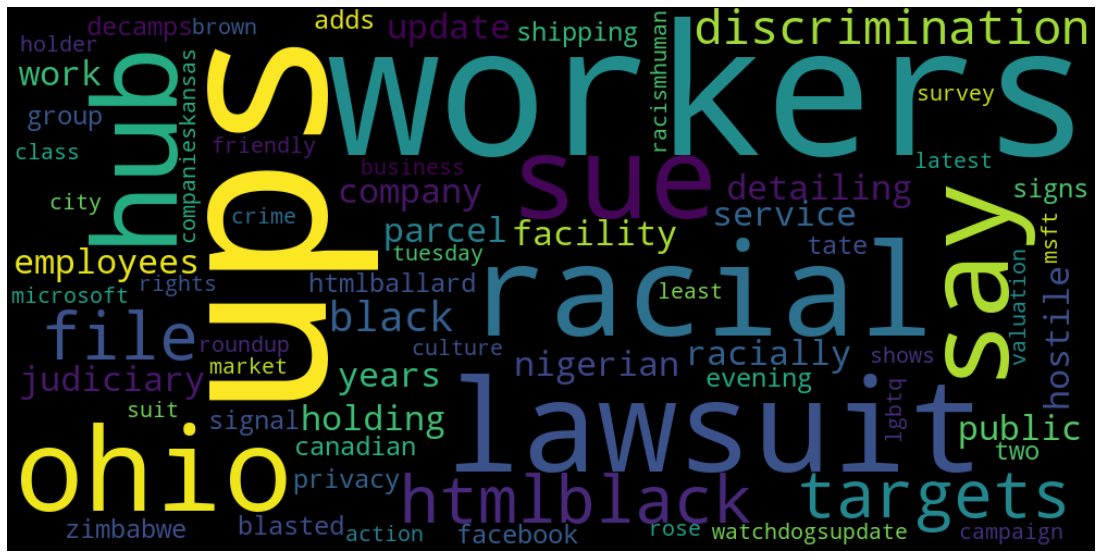

In [366]:
# Wordcloud by frequency
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(max_words = 70,
               max_font_size=200, width=1000, height=500)
wordcloud.generate_from_frequencies(frequencies = new)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Political risk method

In [17]:
words = clean_wordsList(df.loc['activision blizzard inc'].Source)

In [140]:
words = list3

In [152]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=None, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [153]:
common_words = list(dict(Counter(words).most_common(50)).keys())

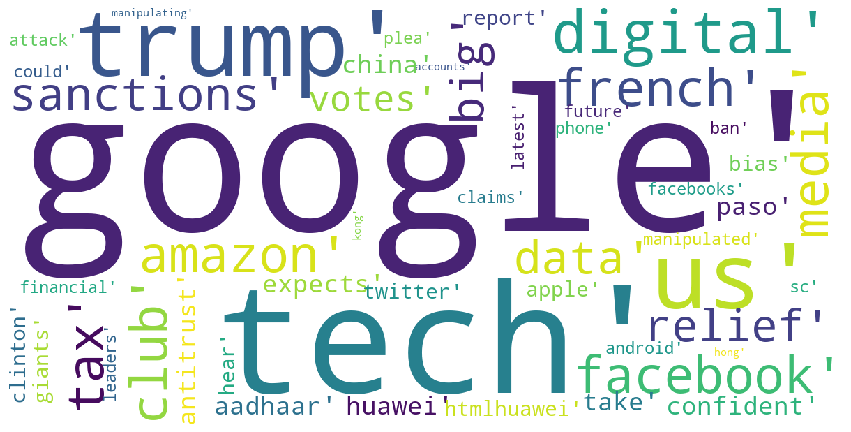

In [154]:
show_wordcloud(common_words)

In [69]:
n_gram = 2
Counter(ngrams(words, n_gram)).most_common(15)

TypeError: 'module' object is not callable

# test

In [94]:
a = [['a','c'],['a','b']]

In [96]:
if ['a','c'] in a:
    print('ok')

ok


In [104]:
df1 = df[df['date'] == '2018-02-02']
url_list = list(df1.loc['eaton corp plc'].SDG_5_url)

In [105]:
url_list

['http://abcnewsradioonline.com/national-news/police-publicly-apologize-to-victim-nearly-14-years-after-br.html',
 'http://kticradio.com/abc_national/police-publicly-apologize-to-victim-nearly-14-years-after-brushing-off-her-complaint-of-being-sexually-assaulted-by-former-olympic-doctor-abcid36029315/',
 'http://wkjc.com/national-news/548f9c4e101d314cd75e830fb88c3d20',
 'http://wadk.com/national-news/548f9c4e101d314cd75e830fb88c3d20',
 'https://www.weisradio.com/police-publicly-apologize-to-victim-nearly-14-years-after-brushing-off-her-complaint-of-being-sexually-assaulted-by-former-olympic-doctor/',
 'http://wondradio.com/abc-national/548f9c4e101d314cd75e830fb88c3d20',
 'http://927thedrive.net/news/national-news/548f9c4e101d314cd75e830fb88c3d20',
 'http://1310kfka.com/2018/02/police-publicly-apologize-to-victim-nearly-14-years-after-brushing-off-her-complaint-of-being-sexually-assaulted-by-former-olympic-doctor/',
 'http://www.wzzm13.com/news/local/michigan/at-town-hall-msu-trustee-mo

In [106]:
list1 = return_end_title(url_list)
list1 = set(list1)
list2 = clean_text(list1)

In [115]:
list2

['more victims ex usa gymnastics doctor testify scandal 110320573 spt html',
 'christopher plummer s route to the oscars the stuff of legend 1 23162920',
 'article_ad9088bf ad3b 561f 9b47 9bf34a779dff html',
 'WSJ Olympic officials didnt act on Nassar claims_',
 'article_68d69492 56d0 50df 9b14 fcb0d853c8ef html',
 'e1163a5e86a027c58bb5d290b70afd87',
 '300244002',
 'police publicly apologize to victim nearly 14 years after brushing off her complaint of former olympic doctor abcid36029315',
 'police publicly apologize to victim nearly 14 years after brushing off her complaint of being sexually assaulted by former olympic doctor',
 'traumatised father of three girls sexually abused by larry nassar attacks him in court',
 'larry nassar to face more victims in court friday',
 'Father lunges at Larry Nassar in court before being restrained 472352033 html',
 'article_65c9b374 e161 5987 b655 1f68d641a0f9 html',
 'judge wont punish father lunged larry nassar',
 'father of victims lunges at nas

In [110]:
data = pd.read_csv('UNGC_SDG_antonyms - March12.csv')

In [111]:
data

,Unnamed: 0,1. No Poverty,2. Zero Hunger,3. Good Health and Well-being,4. Quality Education,5. Gender Equality,6. Clean Water and Sanitaion,7. Affordable and Clean Energy,8. Decent Work and Economic Growth,"9. Industry, Innovation and Infrastructure",10. Reduced Inequalities,11. Sustainable Cities and Communities,12. Responsible Consumption and Production,13. Climate Action,14. Life below Water,15. Life on Land,"16. Peace, Justice and Strong Institutions",17. Partnerships for the Goals
0,0,unemployed person,animal genetic,vaccine,knowledge,asexual,lake,energy mix,labour safetychildren's rights,startup,international organization,holistic disaster risk management,food loss,climate action,enhance scientific cooperation,pursue sustainable livelihood opportunity,transparent institution,stakeholder partnership
1,1,disaster risk,commercial agriculture,medical,pedagogical purpose,sexual health,watersheds,energy technology,migrant worker,entrepreneurs,small-scale industry,disaster risk reduction,hazardous waste treat,environmental protection,united nation framework convention,wildlife,prison population,sustainable develop
2,2,population living,food production,water-borne,quality education,woman equal,oceans,affordable energy,pocal product,small-scale industrial,official development assistance,population growth,sustainable pattern,co2,overfishing,ecosystem,international organization,nonequity investment instruments
3,3,work-injury victims,land use,child health,reading,women's economic empowermentpay gap,ecosystem,energy infrastructure,recruitment,small business owner,financial soundness indicator,urban planning,national policy,disaster risk reduction,sustainable fishery,official development assistance,civil authority,ir department
4,4,social protection floor,chemicals,health organization,primary entry,genital,groundwater,electricity,productive employment,entrepreneurship,donor country,waste management,plasticfinancial reporting,zero waste,seafood,combat desertification,peace,financial inclusion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,74,NaN,food reserve,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,energy efficiency,NaN,NaN,NaN,NaN
75,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,energy,NaN,NaN,NaN,NaN
76,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,island develop,NaN,NaN,NaN,NaN
77,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,global warming,NaN,NaN,NaN,NaN


In [131]:
from nltk.corpus import wordnet
def ranking(url_list, SDG, company_name):
    Dict = {}
    for i in range(len(url_list)):
        count = 0
        for j in data[SDG].dropna():
            if ' ' in j:
                if j in url_list[i]:
                    count += 1
            else:
                synonyms = []
                for syn in wordnet.synsets(j):
                    for l in syn.lemmas():
                        synonyms.append(l.name())
                for m in synonyms:
                    if m in url_list[i]:
                        count += 1
        if company_name in url_list[i]:
            count += 1
        Dict[i] = count
    return Dict

In [132]:

ranking_dict = ranking(list2, '5. Gender Equality', 'eaton corp plc')
k = Counter(ranking_dict)  
# Finding 3 highest values 
high = k.most_common(1000)
ranking_list = []
for i in high:
    ranking_list.append(list2[i[0]])

In [135]:
ranking_list[:50]

['man who tried to attack larry nassar for abusing his daughters will not be charged',
 'man whose daughters abused larry nassar tries attack court watch',
 'police publicly apologize to victim nearly 14 years after brushing off her complaint of being sexually assaulted by former olympic doctor',
 'traumatised father of three girls sexually abused by larry nassar attacks him in court',
 'nassar guilty of sexual abuse attacked by angry father in court',
 'larry nassar faces victims sexual assault',
 'father tries to attack sexual abuser larry nassar in court judge scolds him for his reaction',
 'police publicly apologize to victim nearly 14 years after brushing off her complaint of being sexually assaulted by former olympic doctor abcid36029315',
 'police publicly apologize to victim nearly 14 years after brushing off her complaint of being sexually assaulted by form',
 'at town hall msu trustee mosallam faces questions from survivors of sexual assault',
 'father of sex abuse victims at

In [41]:
df

0                                 asexual
1                           sexual health
2                             woman equal
3     women's economic empowermentpay gap
4                                 genital
5                                     man
6                  psychological violence
7                         guarantee woman
8                     reproductive health
9                        monitor equality
10                                  woman
11                        sexual violence
12                      equal opportunity
13                      woman empowerment
14                          held by woman
15                      public allocation
16                         early marriage
17                   ever-partnered woman
18                                 sexual
19                        gender equality
20     women's empowermentgender equality
21                       woman leadership
22                       woman managerial
23                       forced ma

In [167]:
from nltk.corpus import wordnet
syns = wordnet.synsets("water")
sym_list = []
for i in range(len(syns)):
    sym_list.append(syns[i].lemmas()[0].name())

In [168]:
sym_list

['water',
 'body_of_water',
 'water',
 'water_system',
 'urine',
 'water',
 'water',
 'water',
 'water',
 'water']